<a href="https://colab.research.google.com/github/MDAWOODA/Bikesharing/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
#importing the libraries/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# mounting the drive to access the data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_bike = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dat/SeoulBikeData.csv',encoding='unicode_escape')
df_bike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [4]:
# first 5 rows
df_bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df_bike.shape


(8760, 14)

In [7]:
# statistical values/ aggregate values of all rows
df_bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
#checking for no. of unique values in each column fields
df_bike.apply(lambda x: len(x.unique()) )

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

The important info we get from here is we have 4 seasons ,24 hours,365 dates and 2 functioning day values.

Till Now we did general visualization on our data set by seeing it from different ways.


**PREPROCESSING THE DATASET**

In [11]:
# checking for null values for cleaning unnecessary data
df_bike.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [12]:
df_bike.drop(columns=['Date'])

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [13]:
df_bike.groupby('Seasons')['Seasons'].agg('count')

Seasons
Autumn    2184
Spring    2208
Summer    2208
Winter    2160
Name: Seasons, dtype: int64

We have 4 seasons as autumn,spring,summer and winter 

In [14]:
#change columns to category
cols = ['Seasons','Holiday','Hour','Functioning Day']

for col in cols:
    df_bike[col] = df_bike[col].astype('category')
df_bike.info()    
       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Date                       8760 non-null   object  
 1   Rented Bike Count          8760 non-null   int64   
 2   Hour                       8760 non-null   category
 3   Temperature(°C)            8760 non-null   float64 
 4   Humidity(%)                8760 non-null   int64   
 5   Wind speed (m/s)           8760 non-null   float64 
 6   Visibility (10m)           8760 non-null   int64   
 7   Dew point temperature(°C)  8760 non-null   float64 
 8   Solar Radiation (MJ/m2)    8760 non-null   float64 
 9   Rainfall(mm)               8760 non-null   float64 
 10  Snowfall (cm)              8760 non-null   float64 
 11  Seasons                    8760 non-null   category
 12  Holiday                    8760 non-null   category
 13  Functioning Day            8760 n



 **Exploratory Data Analysis**


[Text(0.5, 1.0, 'count of bikes during differrnt seasons')]

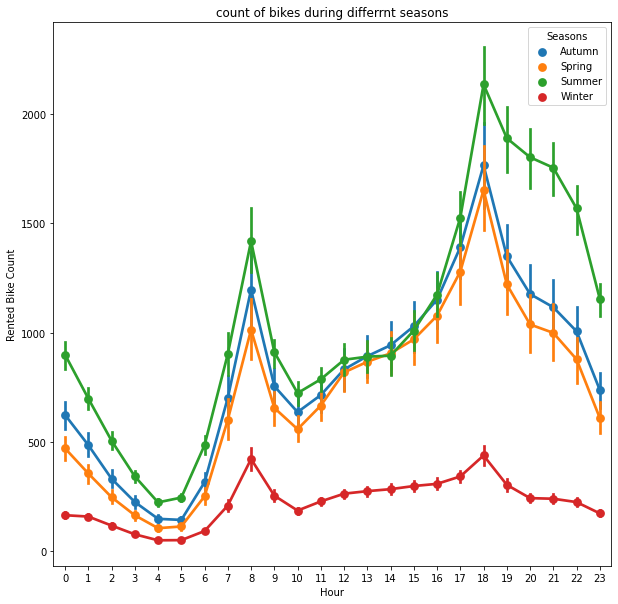

In [15]:
fig,ax=plt.subplots(figsize=(10,10) )
sns.pointplot(data=df_bike,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='count of bikes during differrnt seasons')

From this plot we can conclude many points such as-

*   Summer season has highset requirements of rented bike counts followed by Autumn and spring
*   All the seasons have symmetry along diff time intervals
*   Highest no. of rented bike are used in summer at around 6 pm and after 6 pm also high traffic is there for rented bikes  
*   Similarly a large peak is seen at around 8 am . Theses timing corrosponds to majority of job attending and leaving (most 6 pm) times








[Text(0.5, 1.0, 'count of bikes during differrnt hours')]

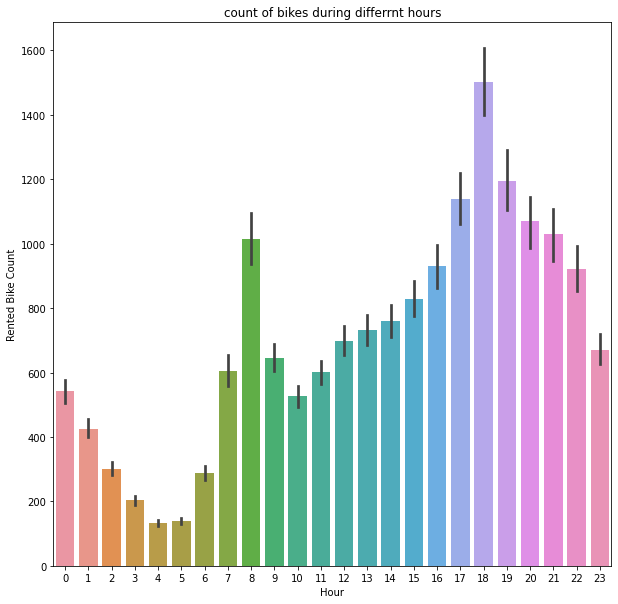

In [16]:
fig,ax=plt.subplots(figsize=(10,10) )
sns.barplot(data=df_bike,x='Hour',y='Rented Bike Count',ax=ax)
ax.set(title='count of bikes during differrnt hours')

From this plot we can conclude exact no. of bike counts used during the particular hour the day


*   1500 bike counts at 6 pm the highest
*   7-10 pm and 8 am in the morning likely heavy traffic for bike counts
*   4,5 am least bike counts (around 150) 
*   This plot is for a year not season wise but the symmetry for each season is same means all the above 3 points are valid for any season.





[Text(0.5, 1.0, 'count of bikes during differrnt seasons')]

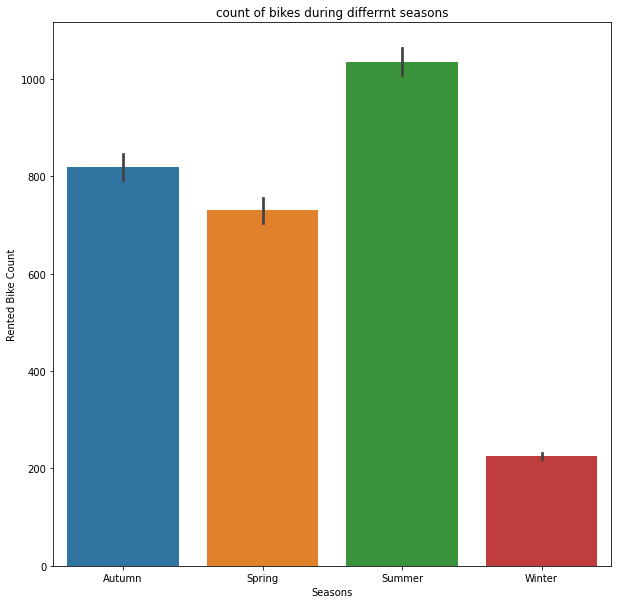

In [21]:
fig,ax=plt.subplots(figsize=(10,10) )
sns.barplot(data=df_bike,x='Seasons',y='Rented Bike Count',ax=ax)
ax.set(title='count of bikes during differrnt seasons')

Overall usage of rented bike during summer(110 apx) season is highest followed by Autumn(810 apx) season ,Spring(770 apx) season and least usage in winter(200 apx) season

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'theoritical quantities')]

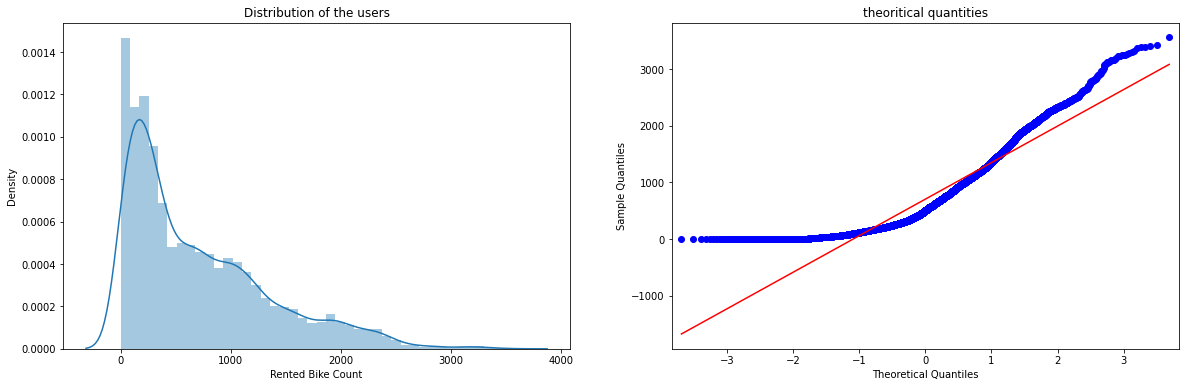

In [18]:
from statsmodels.graphics.gofplots import qqplot
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.distplot(df_bike['Rented Bike Count'],ax=ax1)
ax1.set(title= 'Distribution of the users')
qqplot(df_bike['Rented Bike Count'],ax=ax2,line='s')
ax2.set(title="theoritical quantities")

[Text(0.5, 1.0, 'Relation between temperature and Rented bike counts')]

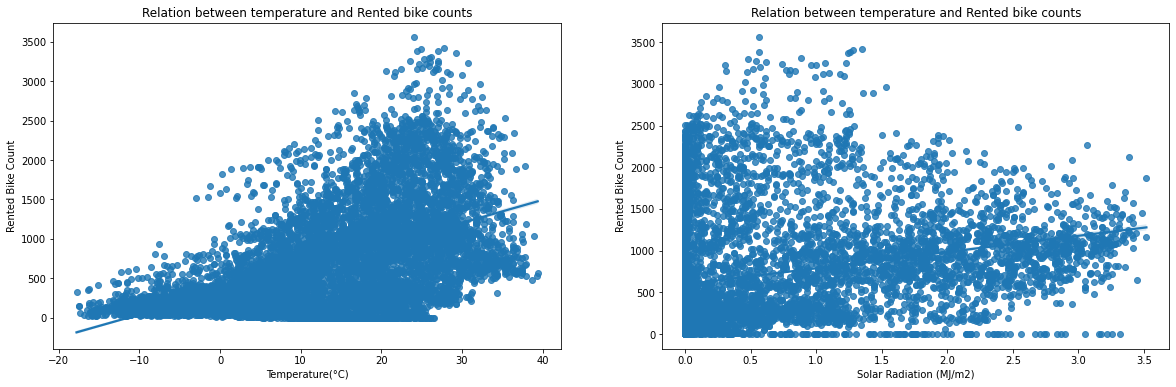

In [27]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6)) 
sns.regplot(x=df_bike['Temperature(°C)'],y=df_bike['Rented Bike Count'],ax=ax1)
ax1.set(title="Relation between temperature and Rented bike counts")

sns.regplot(x=df_bike['Solar Radiation (MJ/m2)'],y=df_bike['Rented Bike Count'],ax=ax2)
ax2.set(title="Relation between solar radiation and Rented bike counts")


*   Highly Dense at around 25 degree - maximum bike counts
*   Very less Dense at arount -10 degree and beyond that - minimum or no bike counts



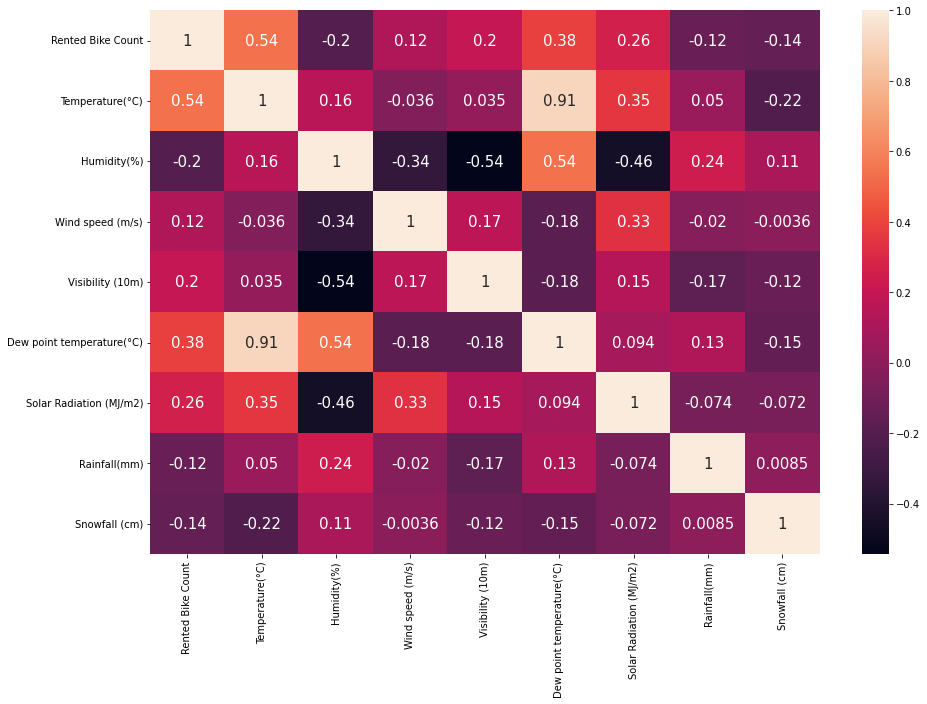

In [17]:
#correlation Matrix
corr = df_bike.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,annot_kws={'size':15})

This is the correlation matrix of heatmap which shows relation between different wheather conditions with Rented bike counts.

*   0.91(very high positive) dependency of Dew point temperature to temperature 
*   Wind speed(0.12),Rainfall(-0.12) and Snowfall(-0.14) very less impact on Rented Bike counts .So we can ignore these factors. 

*   Temperature(0.54) has highest dependency on Rented bike counts .We can say that temperature plays important role to decide rented bike frequency of usage   






**INPUT SPLIT**

In [33]:
df_bike.drop(columns=['Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)'])


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2000,-17.6,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,2000,-17.6,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,2000,-17.7,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,2000,-17.6,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2000,-18.6,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,1894,-10.3,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2000,-9.9,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,1968,-9.9,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1859,-9.8,0.0,Autumn,No Holiday,Yes
